In [1]:
from ensembles import VanillaEnsemble
from datasets import make_dataset, make_cross_validation_dataset
from plot import plot_dataset, plot_prediction, train_and_plot, plot_error
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 4]
from evaluation import evaluate_model
import tensorflow as tf

from tqdm import tqdm


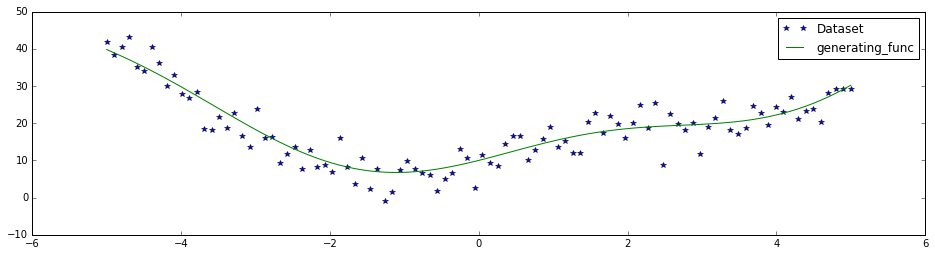

In [2]:
num_epochs = 10
num_eps = 100#75#25
#seed = 43#43 is cool 101 1011
from global_vars import SEED as seed

params = {'num_neurons':[20,20,10],
          'num_epochs':num_epochs,
          'learning_rate':0.001,
          'seed':seed,
          'optimizer':tf.train.AdamOptimizer,
         'keep_prob':0.8,
         'num_samples':15}
    
data = make_dataset(train_p=0.8,seed=seed)

X = data['X']
y = data['y']
X_test = data['X_test']
y_test = data['y_test']
generate_sinoid = data['generating']
#sorted_index = data['train_index']
sorted_index = data['shuffle_index']
#test_index = data['test_ind']

plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

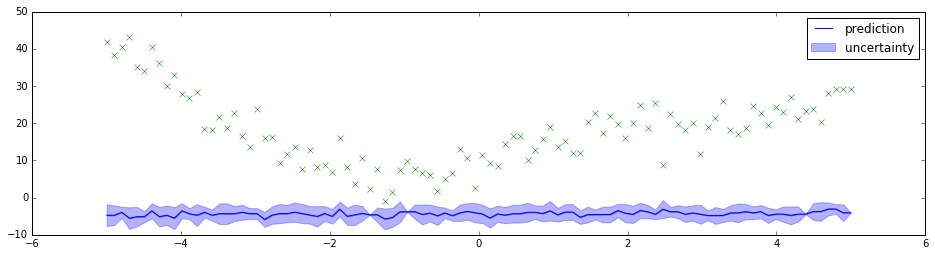

In [3]:
from dropout import DropoutNetwork
dropout = DropoutNetwork(**params)


preds = dropout.predict(X)
var = dropout.predict_var(X)

plot_prediction(X,
                preds,
                sorted_index,
                var)
plt.plot(X,y,'x')

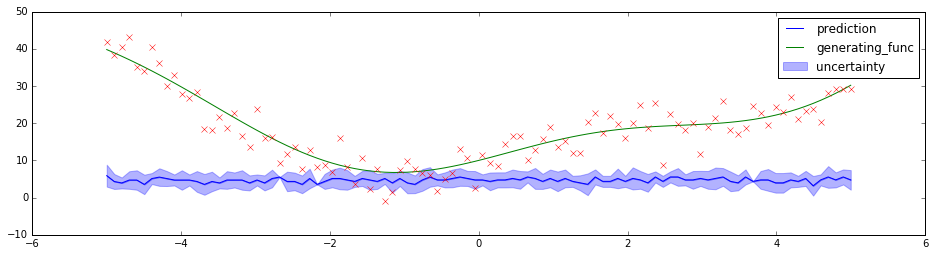

RSME is 16.44583511352539
COVERAGE PROBABILITY is 0.09
MEAN VARIANCE is 2.1402339935302734
COVERAGE/MEAN_VAR is 0.04205147674135704
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.02859653, 0.77761552738335593)


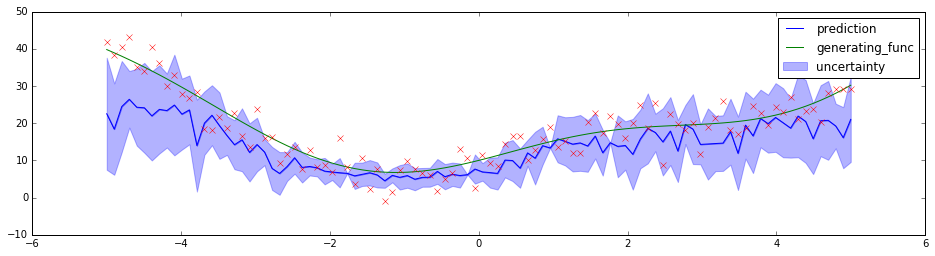

RSME is 6.829059600830078
COVERAGE PROBABILITY is 0.64
MEAN VARIANCE is 6.623913764953613
COVERAGE/MEAN_VAR is 0.09661961533771295
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.48727506, 2.7287519129945851e-07)


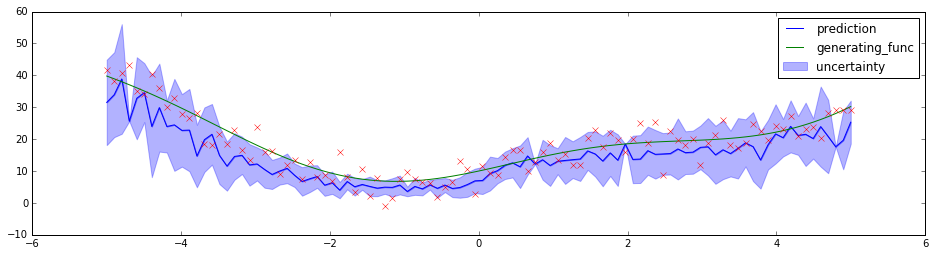

RSME is 5.790480613708496
COVERAGE PROBABILITY is 0.69
MEAN VARIANCE is 6.502445697784424
COVERAGE/MEAN_VAR is 0.10611391960337375
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.12054428, 0.2322240827919464)


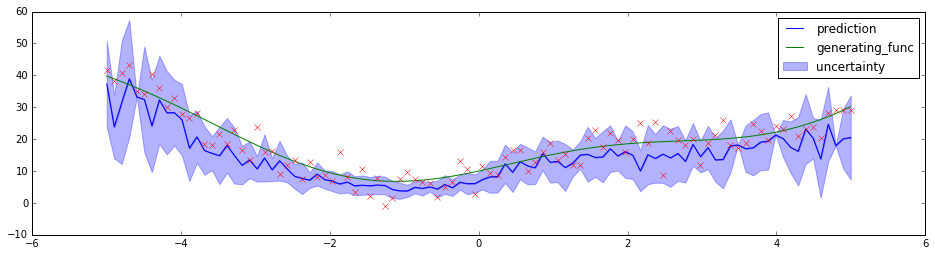

RSME is 5.673182964324951
COVERAGE PROBABILITY is 0.7
MEAN VARIANCE is 6.540246486663818
COVERAGE/MEAN_VAR is 0.1070296052950552
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.22554453, 0.024055293592062345)


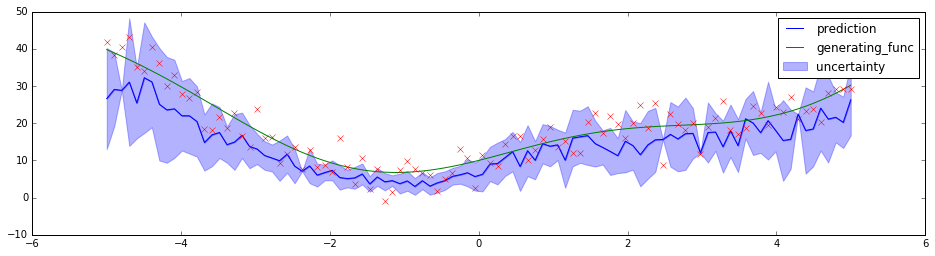

RSME is 5.910491466522217
COVERAGE PROBABILITY is 0.65
MEAN VARIANCE is 6.253247261047363
COVERAGE/MEAN_VAR is 0.10394599363581392
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.37405273, 0.00012626154700450583)


In [4]:
errors = train_and_plot(dropout,X,y,sorted_index,generating_func=generate_sinoid,
               num_eps=num_eps)

In [5]:
for i,b in enumerate([10,10,10]):
    print(i,b)

0 10
1 10
2 10


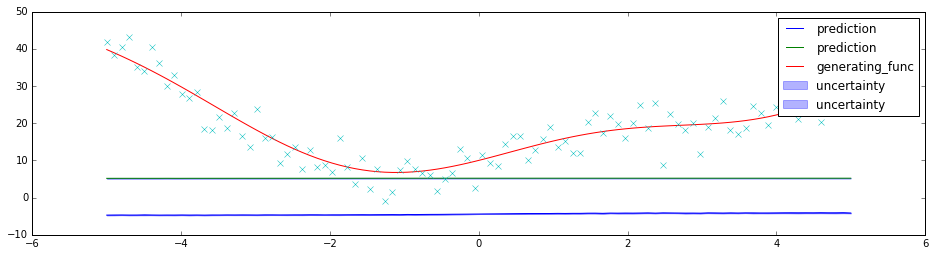

RSME is 16.05657958984375
COVERAGE PROBABILITY is 0.0
MEAN VARIANCE is 0.002778486115857959
COVERAGE/MEAN_VAR is 0.0
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.6669516, 3.5722970503429295e-14)


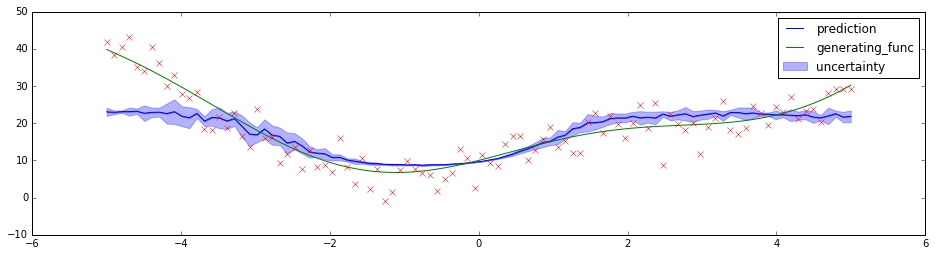

RSME is 6.244026184082031
COVERAGE PROBABILITY is 0.15
MEAN VARIANCE is 1.2149059772491455
COVERAGE/MEAN_VAR is 0.12346634456407725
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (-0.054264512, 0.59180785027258387)


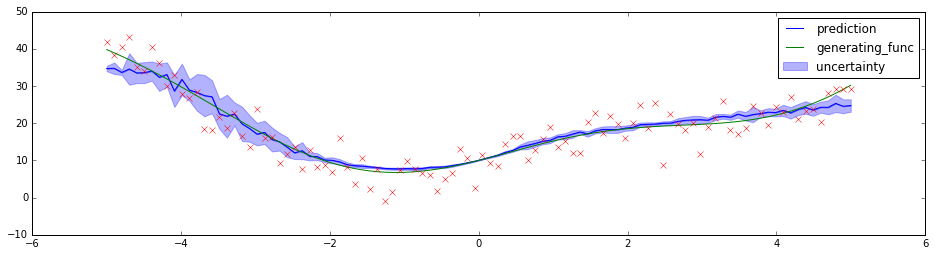

RSME is 4.106189250946045
COVERAGE PROBABILITY is 0.24
MEAN VARIANCE is 1.4532362222671509
COVERAGE/MEAN_VAR is 0.16514864983586983
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.1159189, 0.25076568446727909)


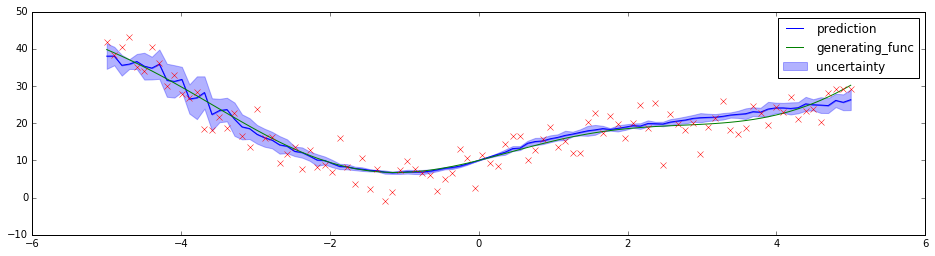

RSME is 3.804908514022827
COVERAGE PROBABILITY is 0.23
MEAN VARIANCE is 1.4969837665557861
COVERAGE/MEAN_VAR is 0.15364228065690844
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (-0.022358311, 0.82524839067281208)


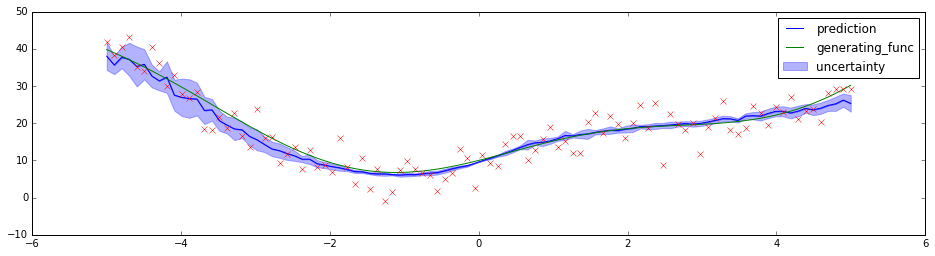

RSME is 3.639138698577881
COVERAGE PROBABILITY is 0.27
MEAN VARIANCE is 1.4145936965942383
COVERAGE/MEAN_VAR is 0.19086752659088566
CORRELATION BETWEEN UNCERTAINTY AND ERROR IS (0.0026317567, 0.9792679218328797)


In [6]:
from dropout import DropoutNetwork
params['dropout_layers']=[0]
dropout = DropoutNetwork(**params)


preds = dropout.predict(X)
var = dropout.predict_var(X)

plot_prediction(X,
                preds,
                sorted_index,
                var)
errors = train_and_plot(dropout,X,y,sorted_index,generating_func=generate_sinoid,
               num_eps=num_eps)